Please use this structure for your report, but you do not have to
slavishly follow this template. All bullet points are merely suggestions
and potential points to discuss in your writeup. Your report should be
no more than 12 pages, including figures. Do not include *any* code or
code output in your report. Indicate your informal collaborators on the
assignment, if you had any.

# Introduction

Things to potentially include in your introduction:

-   Describe the problem of interest and put your analysis in the domain
    context. Read the introduction of the two Nerbonne and Kertzschmar
    papers for some help here.

-   What do you aim to learn from this data?

-   Outline what you will be doing in the rest of the report/analysis

# The Data {#data}

-   What is the data that you will be looking at?

-   Provide a brief overview of the data

-   How is this data relevant to the problem of interest? In other
    words, make the link between the data and the domain problem

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pyreadr import read_r
import numpy as np

# Load the data
ling_data = pd.read_csv('../data/lingData.txt', sep='\\s+')
ling_location = pd.read_csv('../data/lingLocation.txt', sep='\\s+')

# ling_data has a column for each question, and ling_location has a column
# for each question x answer.  Sorry the columns in ling_location are not usefully named,
# but it's not too tricky to figure out which is which.
# Note that you still need to clean this data (check for NA's, missing location data, etc.)

# Load the question_data which contains quest.mat, quest.use, ans.---
question_data = read_r('../data/question_data.RData')

In [ ]:
# Loop through each column and store the value counts
# List of categorical columns
categorical_cols = ['Q050', 'Q051', 'Q052', 'Q053', 'Q054',
                    'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063',
                    'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072',
                    'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081',
                    'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090',
                    'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099',
                    'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109',
                    'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121']
for column in categorical_cols:
     print(ling_data[column].value_counts(dropna=False))
     print()


Q050
4    19358
7    10878
9     8105
1     5858
8     1420
0     1266
2      298
6      128
5       89
3       71
Name: count, dtype: int64

Q051
2    31192
1    13898
0     1294
3     1087
Name: count, dtype: int64

Q052
2    17867
1    15258
3    13079
0     1267
Name: count, dtype: int64

Q053
2    40442
1     5356
0     1307
3      366
Name: count, dtype: int64

Q054
2    42048
1     2928
0     1286
3     1209
Name: count, dtype: int64

Q055
2    40762
1     3537
3     1861
0     1311
Name: count, dtype: int64

Q056
2    28122
1    16380
3     1683
0     1286
Name: count, dtype: int64

Q057
2    31673
1    10951
3     3543
0     1304
Name: count, dtype: int64

Q058
3     24752
2     16292
4      1941
13     1589
0      1301
1      1238
5        93
6        84
8        72
9        38
12       24
7        24
10       17
11        6
Name: count, dtype: int64

Q059
20    23704
3      5359
21     4538
2      3861
1      3110
16     1403
0      1368
19     1059
5       947
15      726
1

Q are the responses to the corresponding question on the
website. A value of 0 indicates no response. The other numbers should directly match the responses on
the website, i.e. a value of 1 should match a response of (a). Data cleaning will drop rows with answers to Q50-Q121 as "0"

In [ ]:
import clean_data  # Import the clean_data1.py module
# Drop rows with more than 25 missing values in the categorical columns

new_ling_data = clean_data.drop_rows_zero(ling_data, categorical_cols, 25)
new_ling_data 
ling_data.shape, new_ling_data.shape

((47471, 73), (46136, 73))

In [ ]:
# Inspect column names
print(ling_data.columns)
print(ling_location.columns)

# Load state geometries
state_df = gpd.read_file('../data/shapefiles')
state_df = state_df[state_df['iso_a2'] == 'US']  # Filter to only US

Index(['ID', 'CITY', 'STATE', 'ZIP', 'Q050', 'Q051', 'Q052', 'Q053', 'Q054',
       'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063',
       'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072',
       'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081',
       'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090',
       'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099',
       'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109',
       'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'lat',
       'long'],
      dtype='object')
Index(['Number of people in cell', 'Latitude', 'Longitude', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10',
       ...
       'V462', 'V463', 'V464', 'V465', 'V466', 'V467', 'V468', 'V469', 'V470',
       'V471'],
      dtype='object', length=471)


In [ ]:
new_ling_data.head()

ID        CITY STATE    ZIP  Q050  Q051  Q052  Q053  Q054  Q055  ...  Q110  \
0   1       Boise    ID  83704     4     1     3     2     3     1  ...     8   
1   2  Pittsfield    MA   1201     4     2     3     2     2     2  ...     8   
2   3  Burlington    VT   5401     4     1     2     2     2     2  ...     4   
3   4      Easton    PA  18042     7     1     1     2     2     2  ...     8   
4   5     Bedford    MA   1730     8     2     3     1     2     2  ...     8   

   Q111  Q115  Q117  Q118  Q119  Q120  Q121        lat        long  
0     2     1     6     7     3     2     3  43.631230 -116.287161  
1     2     1     1     7     1     1     3  42.453840  -73.254003  
2     2     1     4     7     1     2     1  44.484038  -73.221265  
3     1     1     3     7     1     2     1  40.681798  -75.220820  
4     3     1     5     8     1     1     1  42.496679  -71.275046  

[5 rows x 73 columns]

In [ ]:
# load .Rdata file
from pyreadr import read_r
question_data = read_r('/Users/lloydconnelly/stat-215-a/lab2/data/question_data.RData')

In [ ]:
question_data.values()

odict_values([   qnum ans.let    per                                                ans
0     1       a   9.62                               {ah.gif} as in 'ah' 
1     1       b  75.15                             {ash.gif} as in 'ant' 
2     1       c   2.77                   {backwardsa.gif} as in 'caught' 
3     1       d   2.52  I have the same vowel in 'ah', 'caught', and '...
4     1       e   0.58                I pronounce it the same as 'ain't' 
5     1       f   6.64  I use {ah.gif}/{backwardsa.gif} when referring...
6     1       g   1.84  I use {ash.gif} when referring to the general ...
7     1       h   0.88                                             other ,    qnum ans.let    per                                                ans
0    10       a  88.57                                  [i:] as in 'see' 
1    10       b   3.85                              {ih.gif} as in 'sit' 
2    10       c   5.13                        I use both interchangeably 
3    10       d   0.04 

In [ ]:
for key, value in question_data.items():
    print(f"Key: {key}")
    print("Value:")
    print(value)
    print("\n")  # Add a newline for better readability


Key: ans.1
Value:
   qnum ans.let    per                                                ans
0     1       a   9.62                               {ah.gif} as in 'ah' 
1     1       b  75.15                             {ash.gif} as in 'ant' 
2     1       c   2.77                   {backwardsa.gif} as in 'caught' 
3     1       d   2.52  I have the same vowel in 'ah', 'caught', and '...
4     1       e   0.58                I pronounce it the same as 'ain't' 
5     1       f   6.64  I use {ah.gif}/{backwardsa.gif} when referring...
6     1       g   1.84  I use {ash.gif} when referring to the general ...
7     1       h   0.88                                             other 


Key: ans.10
Value:
   qnum ans.let    per                                                ans
0    10       a  88.57                                  [i:] as in 'see' 
1    10       b   3.85                              {ih.gif} as in 'sit' 
2    10       c   5.13                        I use both interchangeably 

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_99667/3326683385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bubbler['Q103'] = bubbler['Q103'].astype(str)


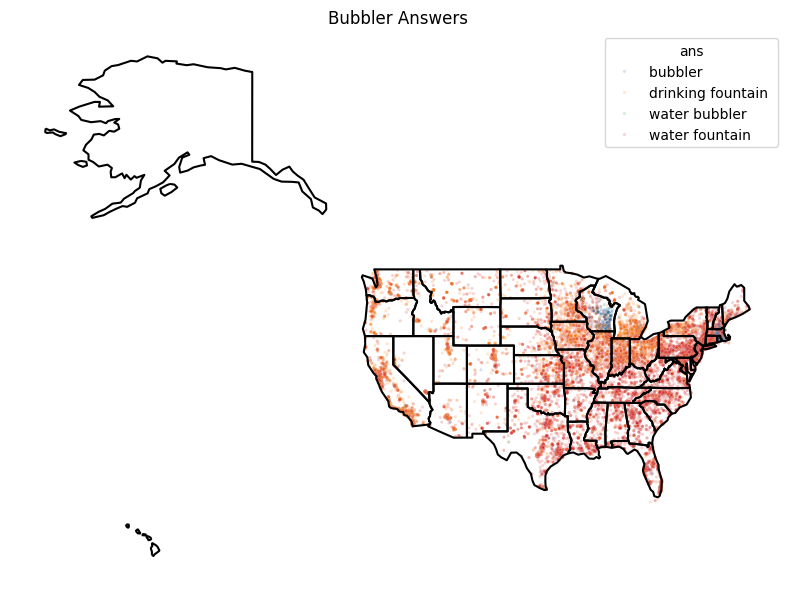

In [ ]:
# Define the map theme
def my_map_theme():
    plt.axis('off')
# Note: the below plots are *ugly*. You can make nicer plots!

############
# Plot for the bubbler answers
bubbler = new_ling_data[(new_ling_data['Q103'].isin([1, 2, 3,4])) & (new_ling_data['long'] > -125)]
answers_q103 = question_data['ans.103']

# Prepare to join
answers_q103['Q103'] = (answers_q103.index + 1).astype(str)
bubbler['Q103'] = bubbler['Q103'].astype(str)
bubbler = bubbler.merge(answers_q103, on='Q103', how='inner')
# remove unused categories
bubbler['ans'] = bubbler['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=bubbler, x='long', y='lat', hue='ans', s=5, alpha=0.2)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("Bubbler Answers")
plt.show()

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_99667/977558857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grass['Q100'] = grass['Q100'].astype(str)


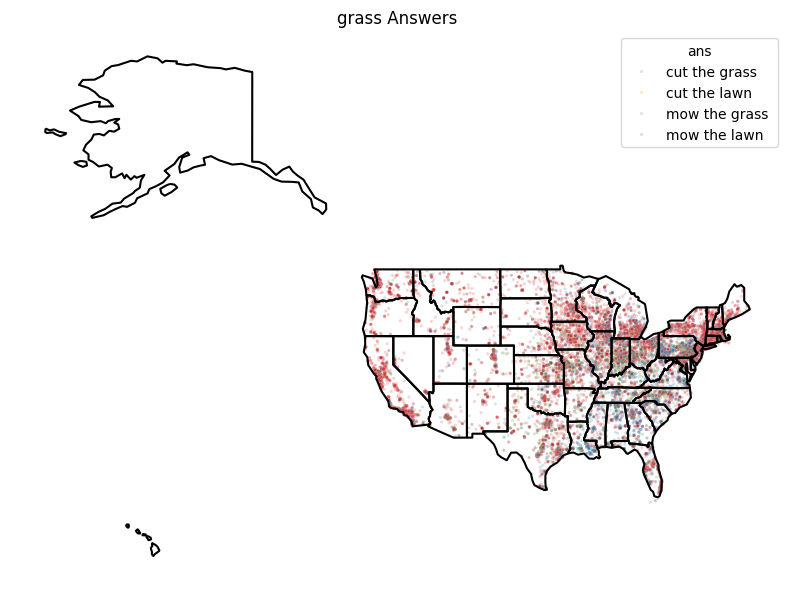

ID        CITY STATE    ZIP  Q050  Q051  Q052  Q053  Q054  Q055  \
0          2  Pittsfield    MA   1201     4     2     3     2     2     2   
1          3  Burlington    VT   5401     4     1     2     2     2     2   
2          5     Bedford    MA   1730     8     2     3     1     2     2   
3          6   SugarLand    TX  77479     8     2     1     2     2     2   
4          7    scituate    MA   2066     7     2     3     2     2     2   
...      ...         ...   ...    ...   ...   ...   ...   ...   ...   ...   
41065  50060  Wilmington    NC  28443     4     2     1     2     2     2   
41066  50061  Cincinnati    OH  45231     7     2     3     2     2     2   
41067  50062     BayCity    MI  48706     1     1     1     2     2     2   
41068  50063     seattle    WA  98103     4     2     1     2     2     2   
41069  50064  Cincinnati    OH  45069     4     2     1     2     2     2   

       ...  Q118  Q119  Q120  Q121        lat        long  qnum  ans.let  \
0      ...     7     1     1     3  42.453840  -73.254003   100        d   
1      ...     7     1     2     1  44.484038  -73.221265   100        d   
2      ...     8     1     1     1  42.496679  -71.275046   100        d   
3      ...     2     1     2     3  29.573345  -95.632132   100        a   
4      ...     7     1     2     3  42.205038  -70.751306   100        d   
...    ...   ...   ...   ...   ...        ...         ...   ...      ...   
41065  ...     7     3     2     3  34.407677  -77.652381   100        d   
41066  ...     6     2     6     6  39.242608  -84.545305   100        d   
41067  ...     7     1     2     3  43.607523  -83.916202   100        a   
41068  ...     7     1     2     3  47.671346 -122.341662   100        a   
41069  ...     8     1     2     3  39.343757  -84.402490   100        d   

         per             ans  
0      66.79   mow the lawn   
1      66.79   mow the lawn   
2      66.79   mow the lawn   
3      18.38  cut the grass   
4      66.79   mow the lawn   
...      ...             ...  
41065  66.79   mow the lawn   
41066  66.79   mow the lawn   
41067  18.38  cut the grass   
41068  18.38  cut the grass   
41069  66.79   mow the lawn   

[41070 rows x 77 columns]

In [ ]:


############
# Plot for the grass answers
grass = new_ling_data[(new_ling_data['Q100'].isin([1, 2, 3,4])) & (new_ling_data['long'] > -125)]
answers_q100 = question_data['ans.100']

# Prepare to join
answers_q100['Q100'] = (answers_q100.index + 1).astype(str)
grass['Q100'] = grass['Q100'].astype(str)
grass = grass.merge(answers_q100, on='Q100', how='inner')
# remove unused categories
grass['ans'] = grass['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=grass, x='long', y='lat', hue='ans', s=5, alpha=0.2)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("grass Answers")
plt.show()
grass


In [ ]:
question_data['ans.103']

qnum ans.let    per                 ans Q103
0   103       a   3.84            bubbler     1
1   103       b   0.30      water bubbler     2
2   103       c  33.16  drinking fountain     3
3   103       d  60.97     water fountain     4
4   103       e   1.74              other     5

In [ ]:
print(ling_data['Q100'].unique())

[0 4 5 1 3 2]


In [ ]:
print(question_data['ans.100'])


   qnum ans.let    per             ans Q100
0   100       a  18.38  cut the grass     1
1   100       b   0.64   cut the lawn     2
2   100       c   5.75  mow the grass     3
3   100       d  66.79   mow the lawn     4
4   100       e   8.43          other     5


In [ ]:
! pip install plotly

import plotly.express as px

def plot_interactive_map(df, question_code):
    fig = px.scatter_mapbox(
        df, lat='lat', lon='long', color=question_code,
        zoom=3, mapbox_style='carto-positron',
        title=f"Interactive Map of Responses for {question_code}"
    )
    fig.show()

# Plot interactive maps
plot_interactive_map(grass, 'ans')
plot_interactive_map(bubbler, 'ans')


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(
    bubbler['ans'],
    grass['ans'],
    margins=True
)
print(contingency_table)


ans                 cut the grass   cut the lawn   mow the grass   \
ans                                                                 
bubbler                        320              8             115   
drinking fountain             3189             89            1067   
water bubbler                   26              1               5   
water fountain                5540            163            2079   
All                           9075            261            3266   

ans                 mow the lawn     All  
ans                                       
bubbler                      1098   1541  
drinking fountain            9925  14270  
water bubbler                  71    103  
water fountain              17374  25156  
All                         28468  41070  


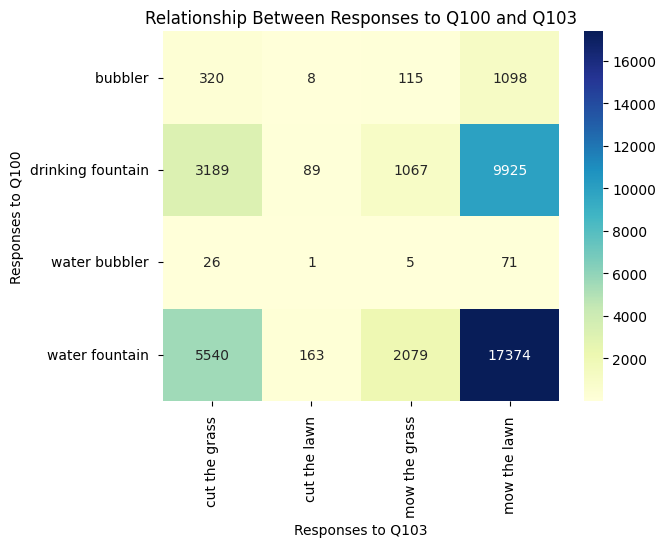

In [ ]:
sns.heatmap(
    contingency_table.iloc[:-1, :-1],
    annot=True, fmt='d', cmap='YlGnBu'
)
plt.title('Relationship Between Responses to Q100 and Q103')
plt.xlabel('Responses to Q103')
plt.ylabel('Responses to Q100')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Prepare the contingency table without margins
contingency = pd.crosstab(
    grass['ans'],
    bubbler['ans']
)

# Perform the chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant association between the responses.")
else:
    print("No significant association found between the responses.")


Chi-squared Test Statistic: 12.7872682247342
P-value: 0.17247076692033975
No significant association found between the responses.


In [ ]:



# # Identify available and missing columns
# available_cols = [col for col in categorical_cols if col in new_ling_data.columns]
# missing_cols = [col for col in categorical_cols if col not in new_ling_data.columns]

# print("Available columns for encoding:", available_cols)
# print("Missing columns:", missing_cols)

# # Check the number of unique values in each column
# unique_values = new_ling_data[available_cols].nunique(dropna=False)
# print("Number of unique values per column:")
# print(unique_values)

# # Identify columns with only one unique value or all NaNs
# columns_to_exclude = unique_values[unique_values <= 1].index.tolist()
# print("Columns with one or zero unique values:", columns_to_exclude)

# Update the list of columns to encode
columns_to_encode = categorical_cols # [col for col in available_cols if col not in columns_to_exclude]
print("Columns to encode:", columns_to_encode)

if columns_to_encode:
    # Convert columns to string type
    new_ling_data[columns_to_encode] = new_ling_data[columns_to_encode].astype(str)
    
    # Replace NaNs with a placeholder if necessary
    new_ling_data[columns_to_encode] = new_ling_data[columns_to_encode].fillna('Missing')
    
    # Perform one-hot encoding
    encoded_new_ling_data = pd.get_dummies(new_ling_data[columns_to_encode])
    
    # Convert boolean values to integers
    encoded_new_ling_data = encoded_new_ling_data.astype(int)
    
    # Assign the one-hot encoded columns directly to 'new_ling_data'
    for col in encoded_new_ling_data.columns:
        new_ling_data[col] = encoded_new_ling_data[col]
    
    # Optionally, drop the original categorical columns
    new_ling_data.drop(columns=columns_to_encode, inplace=True)
    
    # Display the first few rows
    display(new_ling_data.head())
else:
    print("No columns with more than one unique value available for encoding.")


Columns to encode: ['Q050', 'Q051', 'Q052', 'Q053', 'Q054', 'Q055', 'Q056', 'Q057', 'Q058', 'Q059', 'Q060', 'Q061', 'Q062', 'Q063', 'Q064', 'Q065', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071', 'Q072', 'Q073', 'Q074', 'Q075', 'Q076', 'Q077', 'Q078', 'Q079', 'Q080', 'Q081', 'Q082', 'Q083', 'Q084', 'Q085', 'Q086', 'Q087', 'Q088', 'Q089', 'Q090', 'Q091', 'Q092', 'Q093', 'Q094', 'Q095', 'Q096', 'Q097', 'Q098', 'Q099', 'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q109', 'Q110', 'Q111', 'Q115', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121']


/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_99667/3058052577.py:36: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_99667/3058052577.py:36: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_99667/3058052577.py:36: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

ID        CITY STATE    ZIP        lat        long  Q050_0  Q050_1  Q050_2  \
0   1       Boise    ID  83704  43.631230 -116.287161       0       0       0   
1   2  Pittsfield    MA   1201  42.453840  -73.254003       0       0       0   
2   3  Burlington    VT   5401  44.484038  -73.221265       0       0       0   
3   4      Easton    PA  18042  40.681798  -75.220820       0       0       0   
4   5     Bedford    MA   1730  42.496679  -71.275046       0       0       0   

   Q050_3  ...  Q120_5  Q120_6  Q121_0  Q121_1  Q121_2  Q121_3  Q121_4  \
0       0  ...       0       0       0       0       0       1       0   
1       0  ...       0       0       0       0       0       1       0   
2       0  ...       0       0       0       1       0       0       0   
3       0  ...       0       0       0       1       0       0       0   
4       0  ...       0       0       0       1       0       0       0   

   Q121_5  Q121_6  Q121_7  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 541 columns]

Encode the data so that the response is binary instead of categorical. In the previous example of
John and Paul, the encoded binary vectors would be (1, 0, 0, 0, 0, 0, 1) for John and (0, 1, 0, 0, 0, 0, 1)
for Paul. (You might want to do this for the previous question as well.) This makes p = 468 and
n = 47, 471. Experiment with dimension reduction techniques. What do you see? If you do not see
anything, change your projection. Does that make things look different? Did you center and/or scale
your data before performing dimension reduction? Discuss your choice of centering/scaling. Why is
it not a good idea to perform PCA or other dimension reduction techniques on the original lingData
dataset?

Feature matrix shape: (46136, 535)


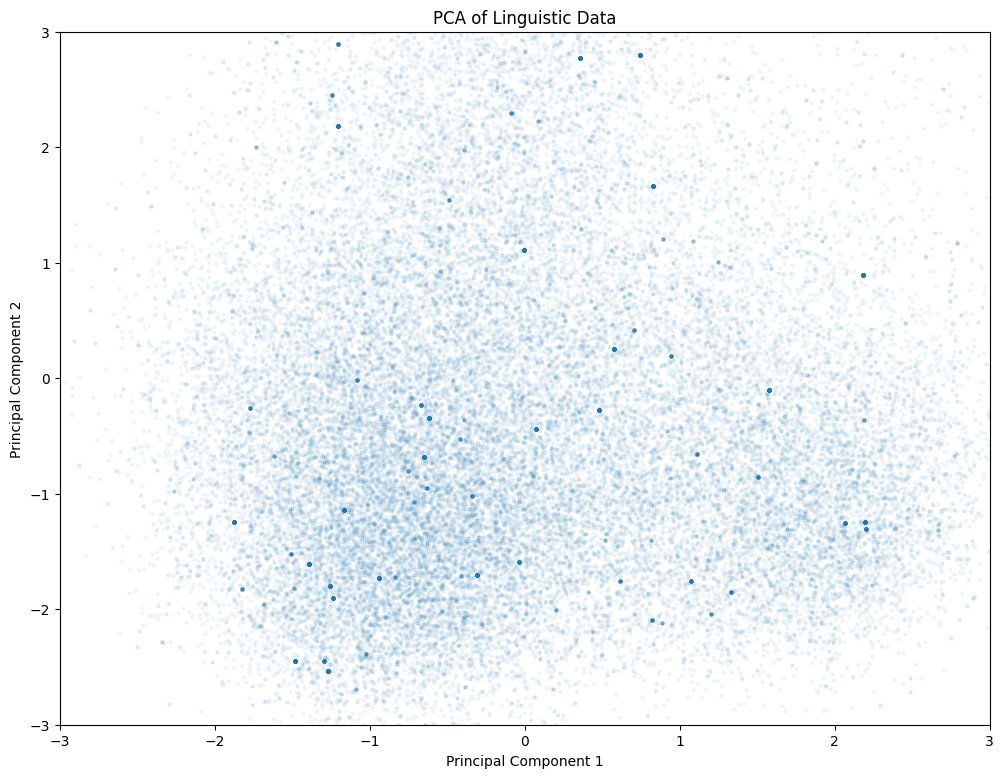

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # For 2D visualization


# Exclude non-feature columns like 'ID', 'lat', 'long', or any other identifiers
non_feature_cols = ['ID', 'lat', 'long']
feature_cols = [col for col in new_ling_data.columns if col not in non_feature_cols and col.startswith('Q')]

# Create feature matrix X
X = new_ling_data[feature_cols].copy()

# Check the shape of X
print(f"Feature matrix shape: {X.shape}")

# Fit PCA to the data
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
pc_df_nonscale = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Combine with non-feature columns if needed
pca_result_nonscale = pd.concat([new_ling_data[non_feature_cols].reset_index(drop=True), pc_df_nonscale], axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.scatter(pc_df_nonscale['PC1'], pc_df['PC2'], alpha=0.05, s=5)  # Smaller markers and more transparency
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Linguistic Data')
plt.xlim(-3, 3)  # Example limits to zoom into the dense part of the data
plt.ylim(-3, 3)
plt.show()



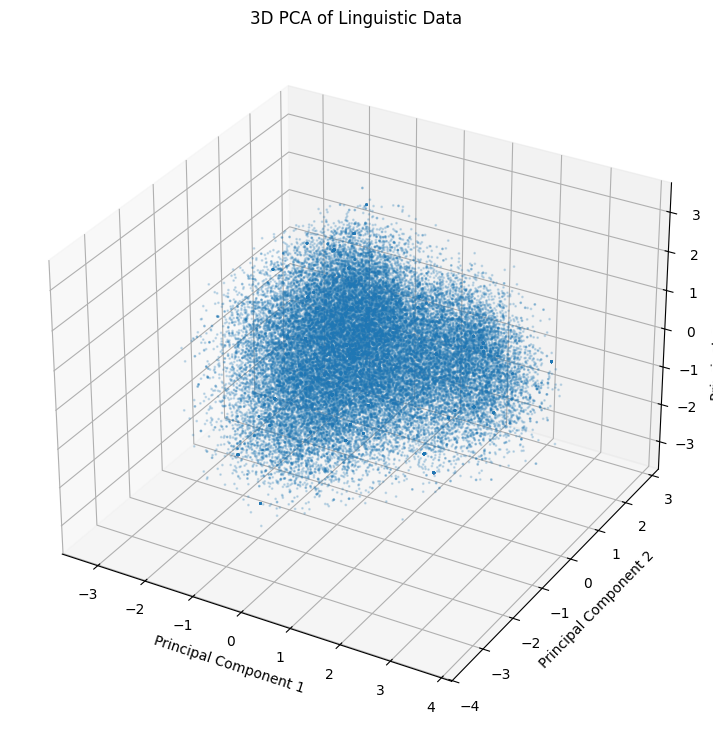

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA with 3 components for 3D visualization
pca = PCA(n_components=3)

# Fit PCA to the data
principal_components = pca.fit_transform(X)

# Create a DataFrame for the 3 principal components
pc_df_3D = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plot the 3D PCA result
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(pc_df_3D['PC1'], pc_df_3D['PC2'], pc_df_3D['PC3'], alpha=0.2, s=1)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Linguistic Data')

# Show the plot
plt.show()


By default, PCA in scikit-learn centers the data (subtracts the mean of each feature), but it does not scale the data (i.e., does not standardize it to unit variance).

Why Centering and Scaling Is Important for PCA:
Centering ensures that the principal components are computed based on the direction of maximum variance from the mean of the data.
Scaling (standardizing to unit variance) is especially important if your features have different units or ranges. Without scaling, features with larger ranges could dominate the PCA, which may lead to incorrect results.
To properly scale your data before PCA, you should use StandardScaler from scikit-learn, which centers and scales each feature.

Feature matrix shape: (46136, 535)


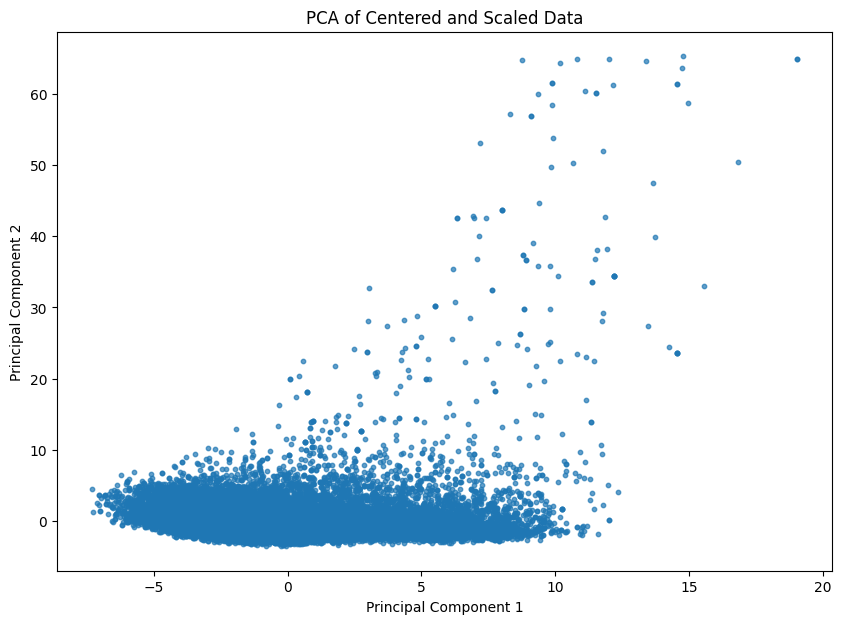

In [ ]:

from sklearn.preprocessing import StandardScaler

# Exclude non-feature columns like 'ID', 'lat', 'long', or any other identifiers
non_feature_cols = ['ID', 'lat', 'long']
feature_cols = [col for col in new_ling_data.columns if col not in non_feature_cols and col.startswith('Q')]

# Create feature matrix X
X = new_ling_data[feature_cols].copy()

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This will center and scale the data

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # For 2D visualization

# Fit PCA to the scaled data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pc_df_scale = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Combine with non-feature columns if needed
pca_result_scale = pd.concat([new_ling_data[non_feature_cols].reset_index(drop=True), pc_df_scale], axis=1)

# Check the shape of the data
print(f"Feature matrix shape: {X_scaled.shape}")
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Centered and Scaled Data')
plt.show()

             PC1       PC2
Q050_0  0.023326  0.090277
Q050_1 -0.006466  0.008231
Q050_2  0.018792  0.003451
Q050_3  0.007730  0.001548
Q050_4 -0.016879 -0.081024
...          ...       ...
Q121_3 -0.005615 -0.003796
Q121_4 -0.000831 -0.007613
Q121_5 -0.000235 -0.005405
Q121_6 -0.024938  0.004685
Q121_7 -0.008293  0.003970

[535 rows x 2 columns]
             PC1       PC2
Q073_1  0.209652 -0.030818
Q073_6 -0.189739  0.033216
Q105_1  0.148928 -0.057069
Q080_1  0.147106 -0.020493
Q084_1  0.137032 -0.030482
Q093_2 -0.132329  0.001311
Q086_1  0.130709 -0.012003
Q066_5 -0.123389  0.026494
Q106_7  0.121860  0.002081
Q083_1  0.121532 -0.010367


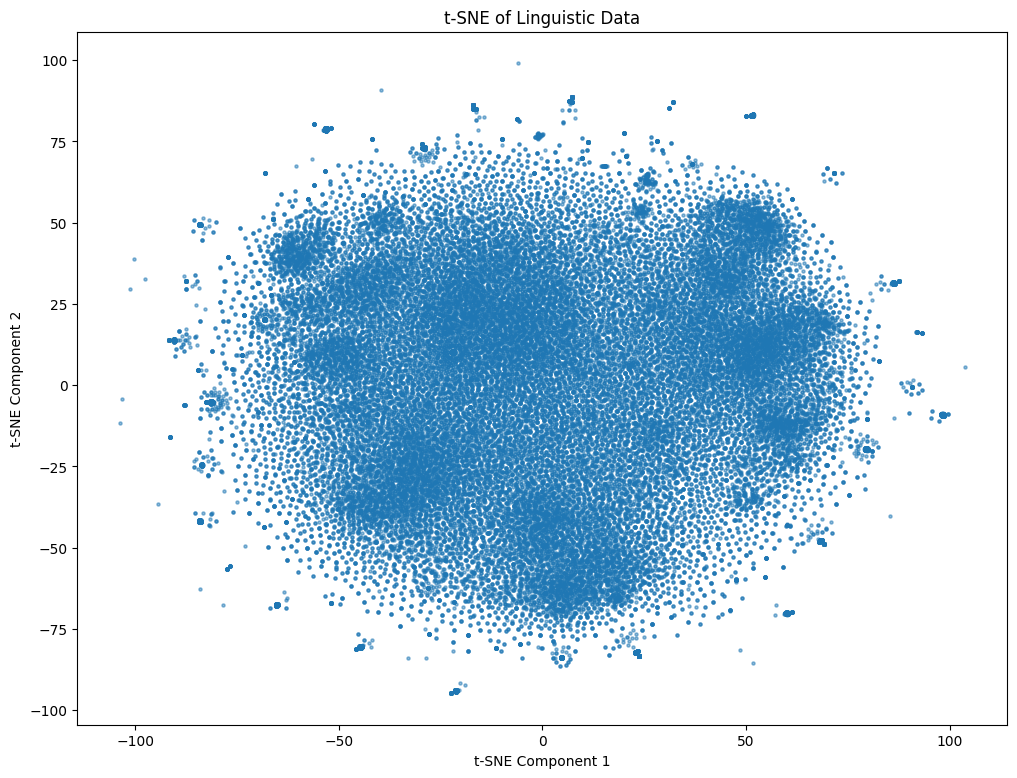

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit t-SNE to the data
tsne_components = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# Plot the t-SNE components
plt.figure(figsize=(12, 9))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.5, s=5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Linguistic Data')
plt.show()


Use the methods we learned in class for clustering to try to gain insights into the full dataset. Perform
at least two different clustering methods. Are there any groups/clusters of people? Do these groups
relate to geography? Are the clusters completely separate or is there a continuum? From where to
where? Which questions produce this continuum or separate the clusters? How did you choose the
number of clusters? Does the mathematical model behind your dimension reduction strategy make
sense for these clusters? What are the advantages and disadvantages of the clustering methods that
you decided to use?

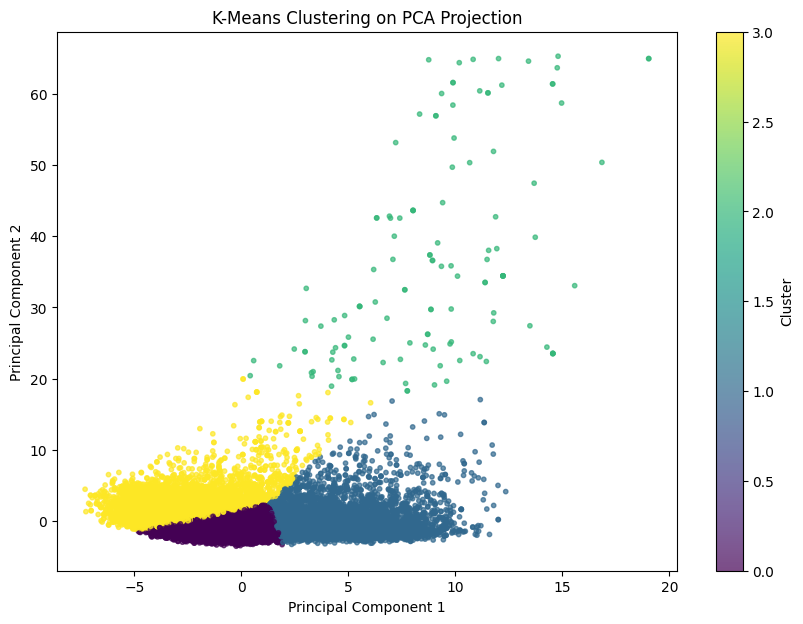

In [ ]:
from sklearn.cluster import KMeans



# Let's assume X_transformed is already scaled and one-hot encoded from the previous step
# If not, apply StandardScaler again on your numerical features.

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters (k)
kmeans_labels = kmeans.fit_predict(pc_df_scale)

# Add cluster labels to the PCA DataFrame
pc_df_scale['KMeans_Cluster'] = kmeans_labels

# Plot K-Means Clustering results on the PCA projection
plt.figure(figsize=(10, 7))
plt.scatter(pc_df_scale['PC1'], pc_df_scale['PC2'], c=pc_df_scale['KMeans_Cluster'], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Projection')
plt.show()


In [ ]:
print(pc_df_scale['KMeans_Cluster'].value_counts())
pca_result_scale['KMeans_Cluster'] = pc_df_scale['KMeans_Cluster']
pca_result_scale

KMeans_Cluster
0    23069
1    11477
3    11462
2      128
Name: count, dtype: int64


ID        lat        long       PC1       PC2  KMeans_Cluster
0          1  43.631230 -116.287161 -0.861760  3.715114               3
1          2  42.453840  -73.254003  5.163210  2.005029               1
2          3  44.484038  -73.221265  4.562783  0.724209               1
3          4  40.681798  -75.220820  4.446937  2.496730               1
4          5  42.496679  -71.275046  4.212887  3.322333               1
...      ...        ...         ...       ...       ...             ...
46131  50060  34.407677  -77.652381 -1.778819 -0.378576               0
46132  50061  39.242608  -84.545305 -1.324144  0.055743               0
46133  50062  43.607523  -83.916202 -0.764036 -1.132271               0
46134  50063  47.671346 -122.341662 -0.695840 -1.154920               0
46135  50064  39.343757  -84.402490  1.119769 -1.624910               0

[46136 rows x 6 columns]

In [ ]:

# Plot interactive maps
plot_interactive_map(pca_result_scale, 'KMeans_Cluster')


In [ ]:
# Get the PCA loadings (components)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_cols)

# Display the loadings
print(loadings)
# Sort by absolute values of PC1 loadings
sorted_loadings_abs_PC1 = loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index)

# Display the top loadings based on absolute values of PC1
print(sorted_loadings_abs_PC1.head(10))  # Adjust to display more if needed


             PC1       PC2
Q050_0  0.023326  0.090277
Q050_1 -0.006466  0.008231
Q050_2  0.018792  0.003451
Q050_3  0.007730  0.001548
Q050_4 -0.016879 -0.081024
...          ...       ...
Q121_3 -0.005615 -0.003796
Q121_4 -0.000831 -0.007613
Q121_5 -0.000235 -0.005405
Q121_6 -0.024938  0.004685
Q121_7 -0.008293  0.003970

[535 rows x 2 columns]
             PC1       PC2
Q073_1  0.209652 -0.030818
Q073_6 -0.189739  0.033216
Q105_1  0.148928 -0.057069
Q080_1  0.147106 -0.020493
Q084_1  0.137032 -0.030482
Q093_2 -0.132329  0.001311
Q086_1  0.130709 -0.012003
Q066_5 -0.123389  0.026494
Q106_7  0.121860  0.002081
Q083_1  0.121532 -0.010367


0     73       a  45.50                         sneakers 
1     73       b   1.93                            shoes 
2     73       c   5.55                         gymshoes 
3     73       d   0.03                       sand shoes 
4     73       e   0.01                          jumpers 
5     73       f  41.34                     tennis shoes 
6     73       g   1.42                    running shoes 
7     73       h   0.17                          runners 
8     73       i   0.23                         trainers 
9     73       j   0.89  I have no general word for this 
10    73       k   2.95                            other 

Choose one of your interesting clustering results. Analyze and discuss the robustness of the clusters.
What happens when you perturb the data set (e.g., via bootstrap or subsampling)? What happens
when you use different starting points in the algorithm? What do you conclude from your clustering
and stability analysis?

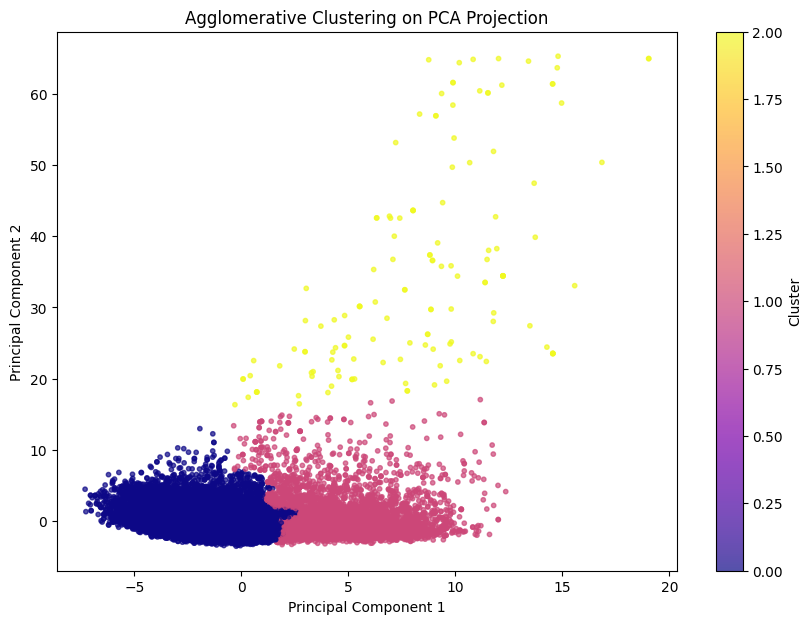

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)  # You can change the number of clusters
agg_labels = agg_cluster.fit_predict(pc_df_scale)

# Add cluster labels to the PCA DataFrame
pc_df_scale['Agg_Cluster'] = agg_labels

# Plot Agglomerative Clustering results on the PCA projection
plt.figure(figsize=(10, 7))
plt.scatter(pc_df_scale['PC1'], pc_df_scale['PC2'], c=pc_df_scale['Agg_Cluster'], cmap='plasma', s=10, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering on PCA Projection')
plt.show()


Choose one of your interesting clustering results. Analyze and discuss the robustness of the clusters.
What happens when you perturb the data set (e.g., via bootstrap or subsampling)? What happens
when you use different starting points in the algorithm? What do you conclude from your clustering
and stability analysis?

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Set number of bootstrap samples
n_bootstrap_samples = 100
n_clusters = 3  # Adjust based on your dataset

# Store cluster assignments from each bootstrap sample
bootstrap_cluster_assignments = []

for i in range(n_bootstrap_samples):
    # Create a bootstrapped dataset (sampling with replacement)
    bootstrap_sample = X_scaled[np.random.choice(X_scaled.shape[0], X_scaled.shape[0], replace=True)]
    
    # Apply K-Means clustering to the bootstrapped dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    bootstrap_labels = kmeans.fit_predict(bootstrap_sample)
    
    # Store the cluster labels
    bootstrap_cluster_assignments.append(bootstrap_labels)

# Compare results: calculate cluster assignment stability (e.g., by counting label matches)


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Assuming you have cluster labels for the original data and a bootstrap sample
original_labels = kmeans.fit_predict(X_scaled)  # Cluster assignments for original data
bootstrap_labels = kmeans.fit_predict(bootstrap_sample)  # Cluster assignments for a bootstrapped sample

# Calculate ARI between original and bootstrapped cluster labels
ari_score = adjusted_rand_score(original_labels, bootstrap_labels)
print(f"Adjusted Rand Index: {ari_score}")


Recall the three realms of data science (Figure 1): data, algorithms and analysis, and future data.
Do you think this data is useful for future decision-making purposes? Why or why not? What about
your clusters (the results of your algorithms and analysis)? Think of a reality check that would help
you to verify your clustering. Given more time, is there anything you would have added or done
differently?

/var/folders/c9/rd_bbydj4t38q93kh_8bg7f00000gn/T/ipykernel_15577/3339115619.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plural_second_person['Q050'] = plural_second_person['Q050'].astype(str)


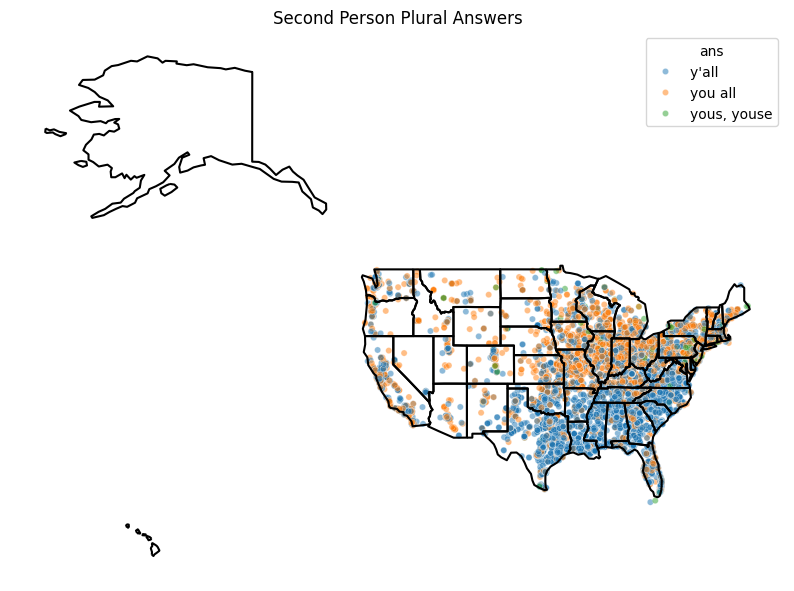

In [ ]:
# Define the map theme
def my_map_theme():
    plt.axis('off')
# Note: the below plots are *ugly*. You can make nicer plots!

############
# Plot for the second person plural answers
plural_second_person = ling_data[(ling_data['Q050'].isin([1, 2, 9])) & (ling_data['long'] > -125)]
answers_q50 = question_data['ans.50']

# Prepare to join
answers_q50['Q050'] = (answers_q50.index + 1).astype(str)
plural_second_person['Q050'] = plural_second_person['Q050'].astype(str)
plural_second_person = plural_second_person.merge(answers_q50, on='Q050', how='inner')
# remove unused categories
plural_second_person['ans'] = plural_second_person['ans'].cat.remove_unused_categories()

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plural_second_person, x='long', y='lat', hue='ans', s=20, alpha=0.5)
state_gdf = gpd.GeoDataFrame(state_df)
state_gdf.boundary.plot(ax=plt.gca(), color='black')
my_map_theme()
plt.title("Second Person Plural Answers")
plt.show()

## Data Cleaning

-   This dataset isn't as bad as the TBI data, but there are still some
    issues. You should discuss them here and describe your strategies
    for dealing with them.

-   Remember to record your preprocessing steps and to be transparent!

## Exploratory Data Analysis {#data-exploration}

-   This is where you compare pairs of questions with discussion and
    plots.

# Dimension Reduction

-   This is where you discuss and show plots about the results of
    whatever dimension reduction techniques you tried---PCA, variants of
    PCA, t-SNE, NMF, random projections, etc.

-   What do you learn from your dimension reduction outputs

-   Discuss centering and scaling decisions

# Clustering

-   This is where you discuss and show plots about the results of
    whatever clustering methods you tried---k-means, hierarchical
    clustering, NMF, etc.

# Stability of findings to perturbation

-   What happens to your clusters when you perturb the data set?

-   What happens when you re-run the algorithm with different starting
    points?

# Conclusion

-   Discuss the three realms of data science by answering the questions
    in the instructions pdf.

-   Come up with a reality check that would help you to verify your
    clustering. You do not necessarily have to perform this reality
    check, but you can if doable.

-   What are the main takeaways from your
    exploration/clustering/stability analysis?

# Academic Honesty {#academic-integrity-statement}

## Statement

Please include your academic honesty statement here. Do NOT include your
name.

## LLM Usage

If, in accordance with the policy in `lab2-instructions.pdf`, you used
the one exception to the LLM ban to help complete the lab, please see
the instructions for what to write here.

## Collaborators

List your collaborators here.


# Bibliography

[1] John Nerbonne and William Kretzschmar. “Introducing computational techniques in dialectometry”.
In: Computers and the Humanities 37 (2003), pp. 245–255.
[2] John Nerbonne and William Kretzschmar. “Progress in dialectometry: toward explanation”. In: Literary
and Linguistic Computing 21.4 (2006), pp. 387–397.